In [3]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfkl
import matplotlib.pyplot as plt

from IPython.display import clear_output
import time

from polymorphic_dense import PolymorphicDense

In [4]:
tf.keras.backend.clear_session()

inp = tfkl.Input(shape=[1])
hid = inp
hid = PolymorphicDense(units=1, modes=10, key_size=1)(hid)

model = tf.keras.Model(inputs = inp, outputs = hid)
model.summary()

optimizer = tf.optimizers.Nadam(.1)
model.compile(loss='MSE', optimizer=optimizer)

inps = 201
scope = 10
v_scaling = 2
x = np.reshape(np.linspace(-scope, scope, inps), [-1, 1])
y = np.sin(x*15/scope)*x+x

vx = np.reshape(np.linspace(-int(scope*v_scaling), int(scope*v_scaling), inps), [-1, 1])
vy = np.sin(vx*15/scope)*vx+vx


model.fit(x=x, y=y, epochs=1, verbose=0)

inputs
(None, 1)
key
(None, 1)
key_bias
(1,)
key
(None, 1)
raw_similarity
(None, 10)
weighted_weights
(None, 10, 1, 1)
kernel
(None, 1, 1)
output
(None, 1)
weighted_biases
(None, 10, 1)
bias
(None, 1)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
polymorphic_dense (Polymorph (None, 1)                 32        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


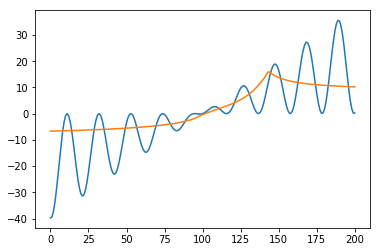

In [5]:
for step in range(30):
    model.fit(x=x, y=y, epochs=1, verbose=0)
    vy_ = np.reshape(model.predict(vx), [-1])
    clear_output(wait=True)
    
    vyr = np.reshape(vy, [-1])
    plt.plot(vyr)
    plt.plot(vy_)
    plt.show()